#### Time

In [1]:
!pip install tf-nightly

     |████████████████████████████████| 345.3MB 49kB/s 
     |████████████████████████████████| 460kB 58.5MB/s 
     |████████████████████████████████| 9.5MB 51.6MB/s 


In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving TSLA_New_Refined.csv to TSLA_New_Refined.csv


In [5]:
df = pd.read_csv('TSLA_New_Refined.csv')

In [6]:
df.head()

,Symbol,Date,Time,Open,High,Low,Last,Change,Volume
0,TSLA,07/31/2020,19:59,1425.36,1425.50,1425.00,1425.50,-0.42,506.0
1,TSLA,07/31/2020,19:57,1425.89,1425.92,1425.89,1425.92,0.90,494.0
2,TSLA,07/31/2020,19:56,1425.12,1425.12,1425.02,1425.02,0.01,300.0
3,TSLA,07/31/2020,19:54,1425.30,1425.35,1425.01,1425.01,0.01,600.0
4,TSLA,07/31/2020,19:53,1425.07,1425.07,1425.00,1425.00,-1.00,796.0


In [7]:
df['Time']=df['Date'] + ' ' + df['Time']

In [8]:
df.head()

,Symbol,Date,Time,Open,High,Low,Last,Change,Volume
0,TSLA,07/31/2020,07/31/2020 19:59,1425.36,1425.50,1425.00,1425.50,-0.42,506.0
1,TSLA,07/31/2020,07/31/2020 19:57,1425.89,1425.92,1425.89,1425.92,0.90,494.0
2,TSLA,07/31/2020,07/31/2020 19:56,1425.12,1425.12,1425.02,1425.02,0.01,300.0
3,TSLA,07/31/2020,07/31/2020 19:54,1425.30,1425.35,1425.01,1425.01,0.01,600.0
4,TSLA,07/31/2020,07/31/2020 19:53,1425.07,1425.07,1425.00,1425.00,-1.00,796.0


In [9]:
df.drop("Date", axis=1, inplace=True)


In [10]:
df.drop("Symbol", axis=1, inplace=True)


In [11]:
df.tail()

,Time,Open,High,Low,Last,Change,Volume
9995,07/13/2020 10:18,1735.302,1736.510,1726.506,1728.883,-5.687,41884.0
9996,07/13/2020 10:17,1735.600,1735.787,1730.922,1734.570,-1.010,24156.0
9997,07/13/2020 10:16,1730.378,1737.490,1729.470,1735.580,6.100,37914.0
9998,07/13/2020 10:15,1726.420,1733.879,1726.420,1729.480,2.380,31153.0
9999,02/08/2453 00:00 03:57am CDT,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.iloc[9999]


Time      02/08/2453 00:00 03:57am CDT
Open                               NaN
High                               NaN
Low                                NaN
Last                               NaN
Change                             NaN
Volume                             NaN
Name: 9999, dtype: object

In [13]:
df.drop(axis=0,index=9999,inplace=True)

In [14]:
df.tail()

,Time,Open,High,Low,Last,Change,Volume
9994,07/13/2020 10:19,1730.040,1730.550,1717.150,1718.920,-9.963,50976.0
9995,07/13/2020 10:18,1735.302,1736.510,1726.506,1728.883,-5.687,41884.0
9996,07/13/2020 10:17,1735.600,1735.787,1730.922,1734.570,-1.010,24156.0
9997,07/13/2020 10:16,1730.378,1737.490,1729.470,1735.580,6.100,37914.0
9998,07/13/2020 10:15,1726.420,1733.879,1726.420,1729.480,2.380,31153.0


In [15]:
df_datetime = pd.to_datetime(df.Time)

In [16]:
# df_datetime[:5]

In [17]:
# datetime=df.pop(pd.to_datetime(df.Time))

In [18]:
print(df_datetime)

0      2020-07-31 19:59:00
1      2020-07-31 19:57:00
2      2020-07-31 19:56:00
3      2020-07-31 19:54:00
4      2020-07-31 19:53:00
               ...        
9994   2020-07-13 10:19:00
9995   2020-07-13 10:18:00
9996   2020-07-13 10:17:00
9997   2020-07-13 10:16:00
9998   2020-07-13 10:15:00
Name: Time, Length: 9999, dtype: datetime64[ns]


In [19]:
df.head()

,Time,Open,High,Low,Last,Change,Volume
0,07/31/2020 19:59,1425.36,1425.50,1425.00,1425.50,-0.42,506.0
1,07/31/2020 19:57,1425.89,1425.92,1425.89,1425.92,0.90,494.0
2,07/31/2020 19:56,1425.12,1425.12,1425.02,1425.02,0.01,300.0
3,07/31/2020 19:54,1425.30,1425.35,1425.01,1425.01,0.01,600.0
4,07/31/2020 19:53,1425.07,1425.07,1425.00,1425.00,-1.00,796.0


Let's take a glance at the data. Here are the first few rows:

In [20]:
df.head()

,Time,Open,High,Low,Last,Change,Volume
0,07/31/2020 19:59,1425.36,1425.50,1425.00,1425.50,-0.42,506.0
1,07/31/2020 19:57,1425.89,1425.92,1425.89,1425.92,0.90,494.0
2,07/31/2020 19:56,1425.12,1425.12,1425.02,1425.02,0.01,300.0
3,07/31/2020 19:54,1425.30,1425.35,1425.01,1425.01,0.01,600.0
4,07/31/2020 19:53,1425.07,1425.07,1425.00,1425.00,-1.00,796.0


Here is the evolution of a few features over time. 

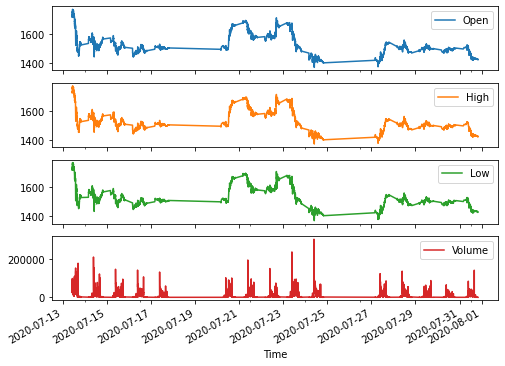

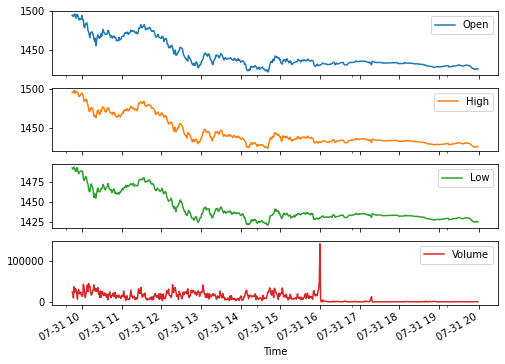

In [21]:
plot_cols = ['Open', 'High', 'Low','Volume']
plot_features = df[plot_cols]
plot_features.index = df_datetime
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df_datetime[:480]
_ = plot_features.plot(subplots=True)

### Inspect and cleanup

Next look at the statistics of the dataset:

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,9999.0,1529.028699,71.414544,1372.440,1488.7415,1511.282,1574.8350,1773.720
High,9999.0,1530.753896,71.696502,1374.660,1490.0000,1512.890,1576.3305,1775.000
Low,9999.0,1527.180685,71.105273,1366.540,1487.4650,1510.000,1572.0000,1769.970
Last,9999.0,1528.976309,71.366114,1371.703,1488.8400,1511.300,1574.4950,1774.409
Change,9999.0,-0.030163,3.758560,-47.152,-1.5055,0.000,1.5000,87.450
Volume,9999.0,13190.308231,17929.578396,100.000,685.5000,7236.000,19194.5000,303242.000


Similarly the `Date Time` column is very useful, but not in this string form. Start by converting it to seconds:

In [23]:
timestamp_s = df_datetime.map(datetime.datetime.timestamp)


In [24]:
timestamp_s

0       1.596226e+09
1       1.596225e+09
2       1.596225e+09
3       1.596225e+09
4       1.596225e+09
            ...     
9994    1.594636e+09
9995    1.594635e+09
9996    1.594635e+09
9997    1.594635e+09
9998    1.594635e+09
Name: Time, Length: 9999, dtype: float64

In [25]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

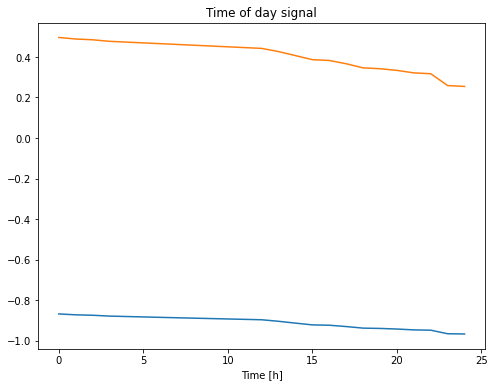

In [26]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

### Split the data

We'll use a `(70%, 20%, 10%)` split for the training, validation, and test sets. Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [27]:
df.pop("Time")

0       07/31/2020 19:59
1       07/31/2020 19:57
2       07/31/2020 19:56
3       07/31/2020 19:54
4       07/31/2020 19:53
              ...       
9994    07/13/2020 10:19
9995    07/13/2020 10:18
9996    07/13/2020 10:17
9997    07/13/2020 10:16
9998    07/13/2020 10:15
Name: Time, Length: 9999, dtype: object

In [28]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [29]:
train_df.head()

,Open,High,Low,Last,Change,Volume,Day sin,Day cos,Year sin,Year cos
0,1425.36,1425.50,1425.00,1425.50,-0.42,506.0,-0.868199,0.496217,-0.494769,-0.869024
1,1425.89,1425.92,1425.89,1425.92,0.90,494.0,-0.872496,0.488621,-0.494749,-0.869036
2,1425.12,1425.12,1425.02,1425.02,0.01,300.0,-0.874620,0.484810,-0.494738,-0.869042
3,1425.30,1425.35,1425.01,1425.01,0.01,600.0,-0.878817,0.477159,-0.494717,-0.869054
4,1425.07,1425.07,1425.00,1425.00,-1.00,796.0,-0.880891,0.473320,-0.494707,-0.869060


In [30]:
#test_df

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that we get (somewhat) honest metrics. So in the interest of simplicity this tutorial uses a simple average.

In [31]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

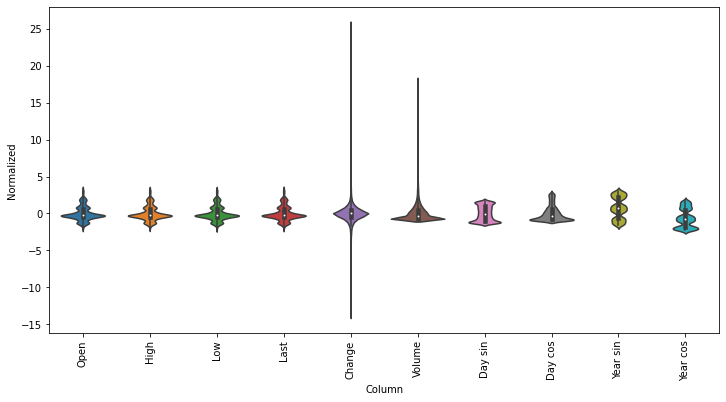

In [32]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [33]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [34]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Last'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Last']

In [36]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

Try it out:

In [38]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 10)
Inputs shape: (3, 24, 10)
labels shape: (3, 1, 1)


### 3. Plot

Here is a plot method that allows a simple visualization of the split window:

In [39]:
w1.example = example_inputs, example_labels

In [40]:
def plot(self, model=None, plot_col='Last', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:

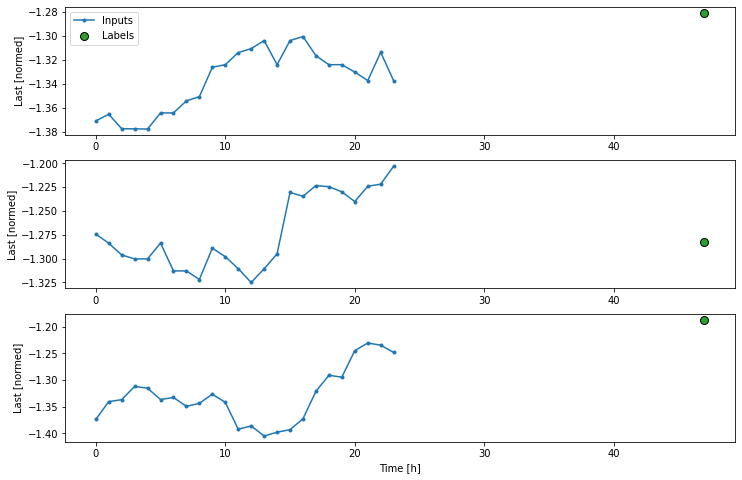

In [41]:
w1.plot()

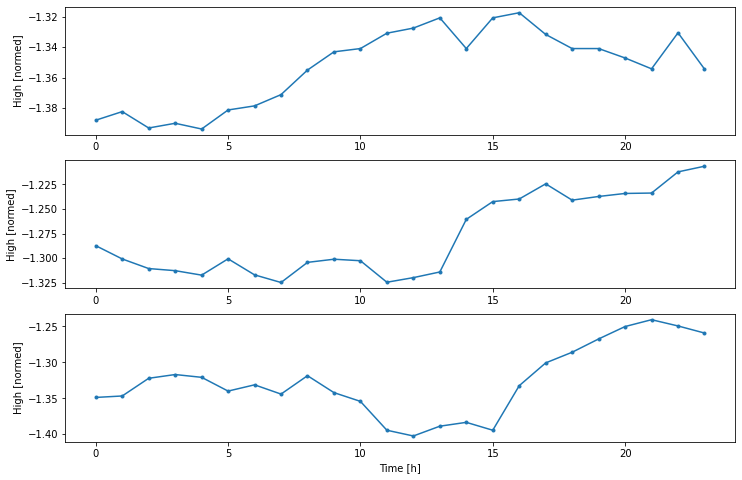

In [42]:
w1.plot(plot_col='High')

### 4. Create `tf.data.Dataset`s

Finally this `make_dataset` method will take a time series `DataFrame` and convert it to a `tf.data.Dataset` of `(input_window, label_window)` pairs using the `preprocessing.timeseries_dataset_from_array` function.

In [43]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation and test data. Add properties for accessing them as `tf.data.Datasets` using the above `make_dataset` method. Also add a standard example batch for easy access and plotting:

In [44]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [46]:
# Each element is an (inputs, label) pair
w1.train.element_spec

(TensorSpec(shape=(None, 24, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [47]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 10)
Labels shape (batch, time, features): (32, 1, 1)


In [48]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Last'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Last']

In [49]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 10)
Labels shape (batch, time, features): (32, 1, 1)


### Baseline





In [50]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Instantiate and evaluate this model:

In [51]:
baseline = Baseline(label_index=column_indices['Last'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

63/63 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0307


In [52]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Last'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Last']

In [53]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 10)
Output shape: (32, 1, 1)


Plotting the baseline model's predictions you can see that it is simply the labels, shifted right by 1h.

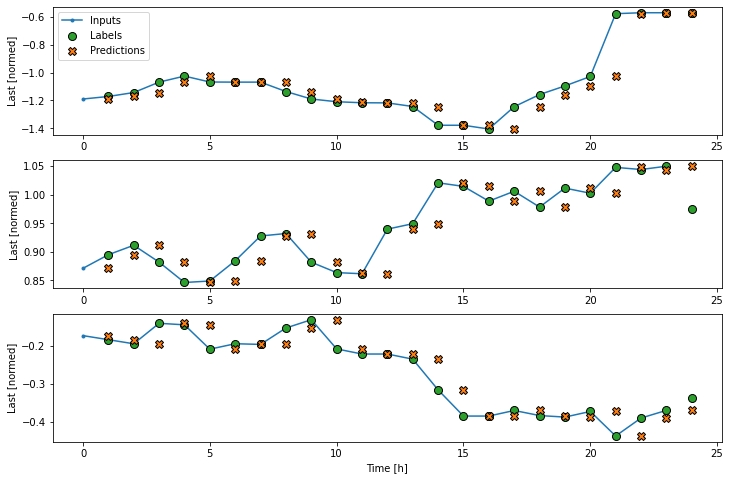

In [54]:
wide_window.plot(baseline)

In the above plots of three examples the single step model is run over the course of 24h. This deserves some explaination:

* The blue "Inputs" line shows the input price at each time step. The model recieves all features, this plot only shows the price.
* The green "Labels" dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
* The orange "Predictions" crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the "labels".

### Linear model



In [55]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [56]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 10)
Output shape: (32, 1, 1)


In [57]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Train the model and evaluate its performance:

In [59]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
219/219 [==============================] - 1s 5ms/step - loss: 8.4606e-04 - mean_absolute_error: 0.0219 - val_loss: 0.0153 - val_mean_absolute_error: 0.1212
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 7.0000e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0123 - val_mean_absolute_error: 0.1082
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 5.7732e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0101 - val_mean_absolute_error: 0.0985
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 4.7375e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0074 - val_mean_absolute_error: 0.0841
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 3.7734e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0049 - val_mean_absolute_error: 0.0681
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 3.0144e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0034 - val_mean_absolute_error:

Like the `baseline` model, the linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecuitive time steps. The `time` axis acts like another `batch` axis. There are no interactions between the precictions at each time step.




In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


Here is the plot of its example predictions on the `wide_widow`, note how in many cases the prediction is clearly better than just returning the input temperature, but in a few cases it's worse:

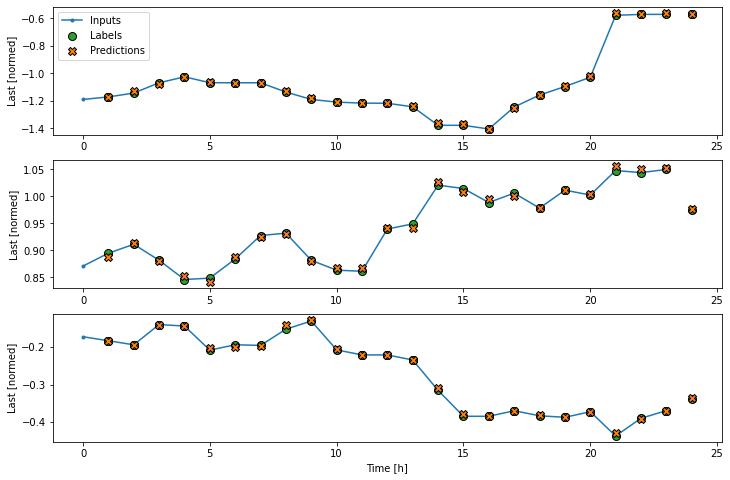

In [61]:
wide_window.plot(linear)

### Dense

Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.



In [62]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0997 - mean_absolute_error: 0.1739 - val_loss: 0.0055 - val_mean_absolute_error: 0.0568
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0279 - val_loss: 0.0053 - val_mean_absolute_error: 0.0487
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0271 - val_loss: 0.0020 - val_mean_absolute_error: 0.0325
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 6.8773e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0022 - val_mean_absolute_error: 0.0334
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 5.8655e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0016 - val_mean_absolute_error: 0.0293
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 4.1324e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0015 - val_mean_absolute_error: 0.0288
Epoc

### Multi-step dense

A single-time-step model has no context for the current values of its inputs. It can't see how the input features are changing over time. To address this issue the model needs access to multiple time steps when making predictions:



Note that the `Window`'s `shift` parameter is relative to the end of the two windows.



In [64]:
CONV_WIDTH = 6
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Last'])

conv_window

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Last']

Text(0.5, 1.0, 'Given 6h as input, predict 1h into the future.')

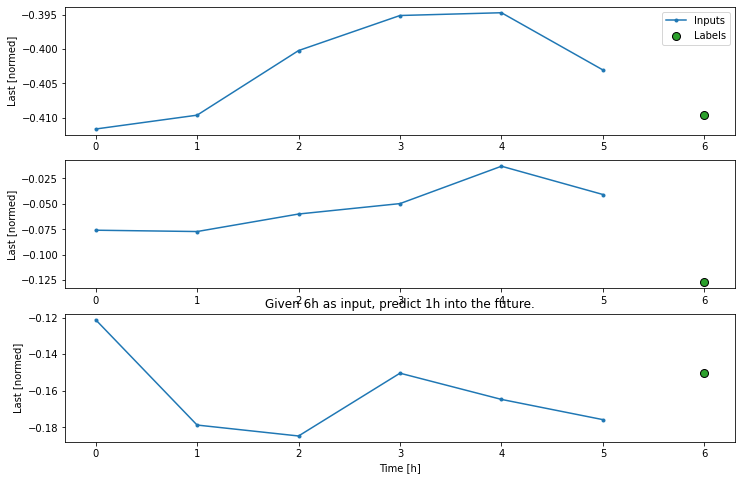

In [66]:
conv_window.plot()
plt.title("Given 6h as input, predict 1h into the future.")

In [67]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [68]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 6, 10)
Output shape: (32, 1, 1)


In [69]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

63/63 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0358


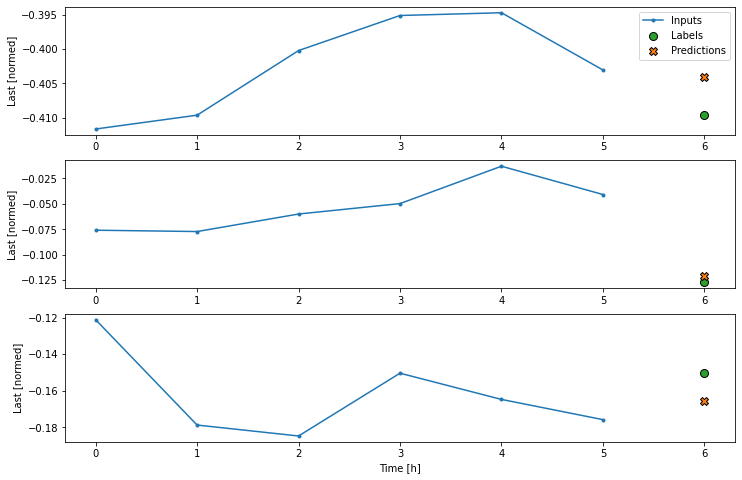

In [70]:
conv_window.plot(multi_step_dense)

### Convolution neural network
 
A convolution layer (`layers.Conv1D`) also takes multiple time steps as input to each prediction.

In [71]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

Run it on an example batch to see that the model produces outputs with the expected shape:

In [72]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 6, 10)
Output shape: (32, 1, 1)


Train and evaluate it on the ` conv_window` and it should give performance similar to the `multi_step_dense` model.

In [73]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

63/63 [==============================] - 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0438


In [74]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 19, 1)


In [75]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Last'])

wide_conv_window

Total window size: 30
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Label indices: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Label column name(s): ['Last']

In [76]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 29, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


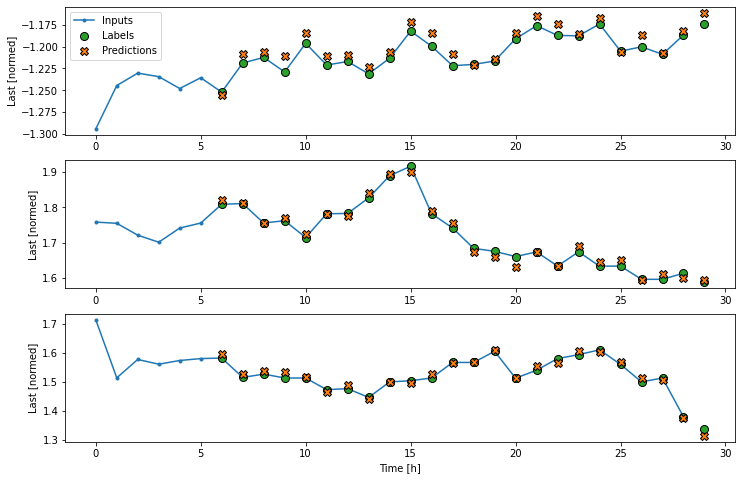

In [77]:
wide_conv_window.plot(conv_model)

### Recurrent neural network

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

In [78]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [79]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


In [80]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

62/62 [==============================] - 0s 6ms/step - loss: 7.2887e-04 - mean_absolute_error: 0.0203


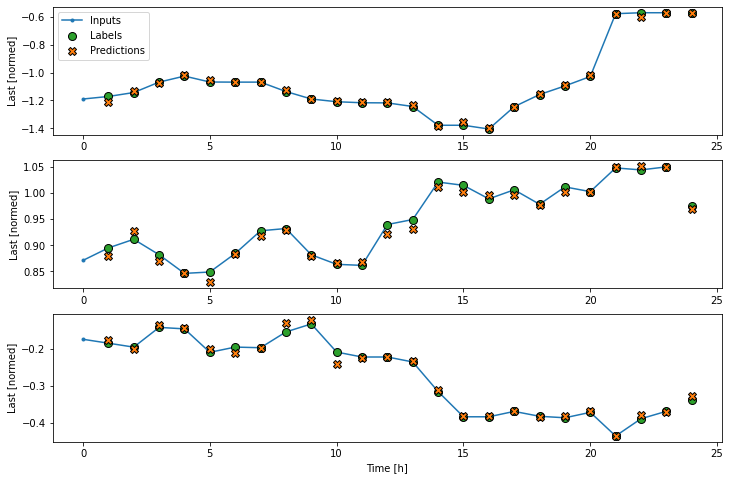

In [81]:
wide_window.plot(lstm_model)